<a href="https://colab.research.google.com/github/kshitijmamgain/Health-Analysis/blob/master/Pima_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIMA Analysis on Diabetes Prediction
## Experiments with different machine learning algorithms
We have a dataset, not large but good enough to continue to learn about the classification through Machine Learning. The different models deployed would have pros and cons. We start with more simpler and then shift to complex ones like Deep Neural Networks. We would also see what is bias and variance in different models

In [0]:
import pandas as pd

In [0]:
url = 'https://raw.githubusercontent.com/kshitijmamgain/test/master/1576935540_pima.csv'
df = pd.read_csv(url, header = None)

In [3]:
df.head(3)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


The dataset has 8 features and 9th column is a label. I am interested to also see how the data is distributed


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The dataset has no missing value but has a different range for different feature set. ONe of the best practices to imporve the prediction is to normalize the data before fitting the model. Let us also explore if there is any visible correlation between the features. For the we could use Seaborn

Text(0.5, 1, 'Correlation between features and label')

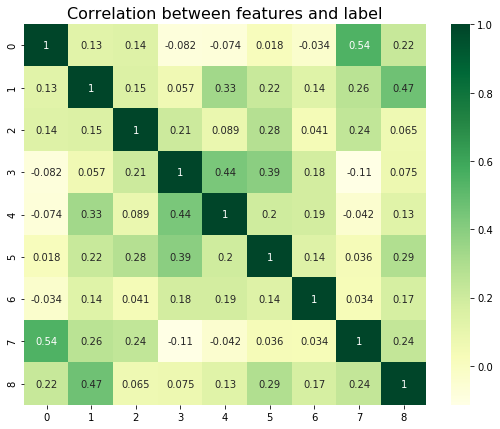

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(9,7))
fig = sns.heatmap(df.corr(), annot= True, cmap = "YlGn")
plt.title("Correlation between features and label", size = 16)


From the heatmap we are able see that the feature set do not have a clear linear relation with the label and neither does in indicate linear-collinearity within the feature set. Let us try to visualize the disribution of the features

Text(0.5, 1, 'Feature set pairplot')

<Figure size 864x864 with 0 Axes>

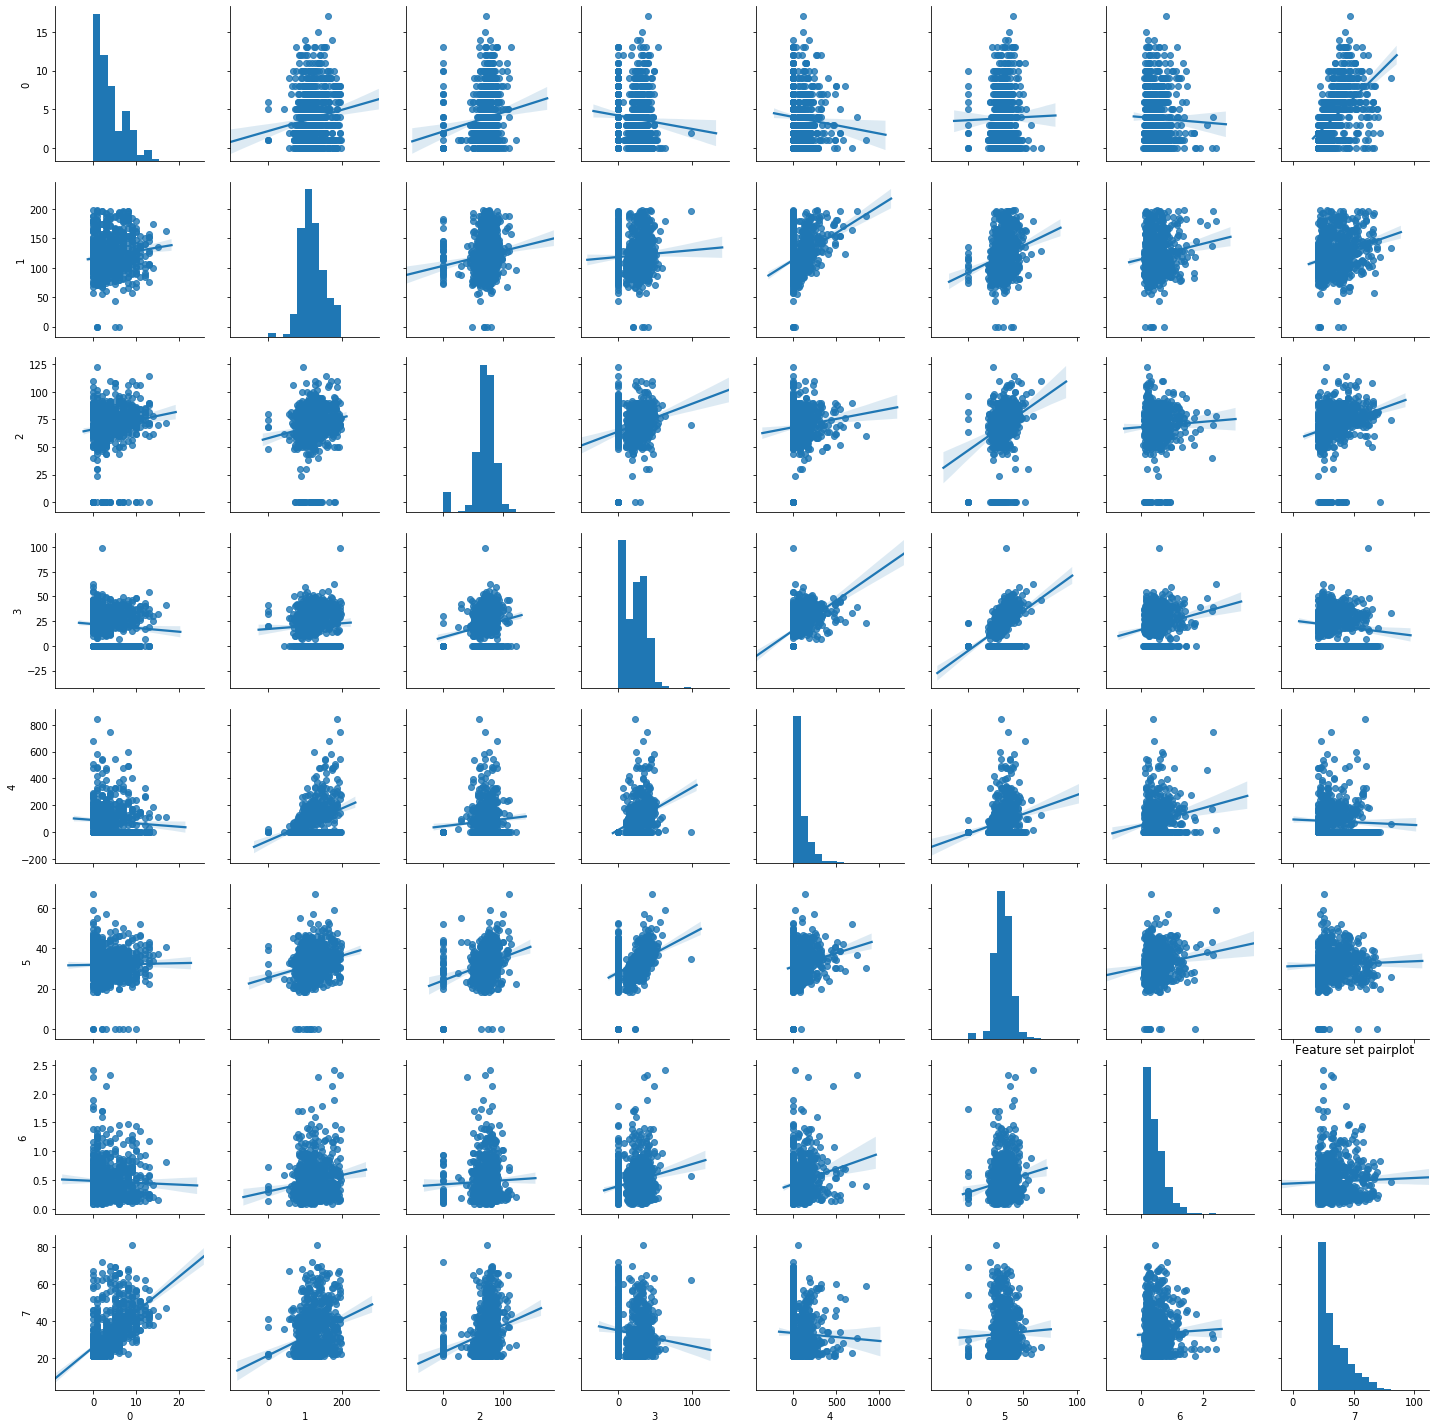

In [6]:
plt.figure(figsize = (12,12))
sns.pairplot(df.drop(8, axis = 1), kind = 'reg') # excludes the label
plt.title("Feature set pairplot")

In the figure above we see different feature column have different type of distribution. For many features there is and abrupt cut-off in initial value. We also see that certain features like 2,3 and 4 have string of same values. Let us see if the data has too much of outliers by using boxplots

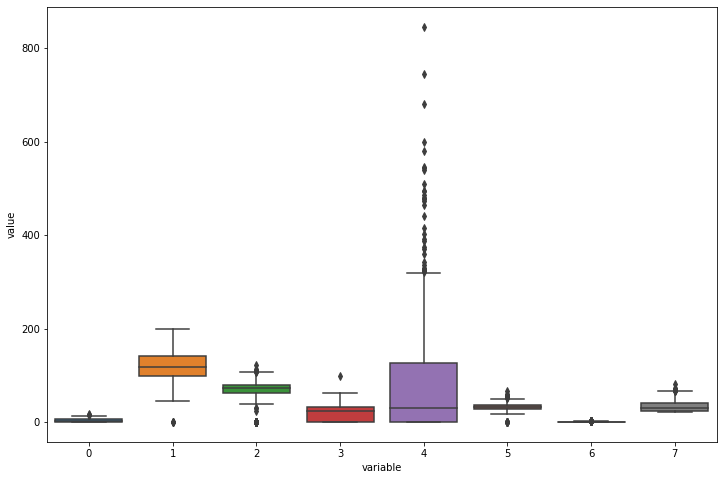

In [7]:
plt.figure(figsize=(12,8))
sns.boxplot(x = "variable", y = "value", data = pd.melt(df.drop(8, axis =1)))


As seen from the figure 2,3 and 4 have many outliers and as an analyst, I would be more cautious to know what these value signify

Once a preliminary picture about data is understood we should start with machine learning prediction. Let us prepare feature set and label set. But before that I would also like to know how is the information distrbuted for labels. Is it biased towards one value or not.

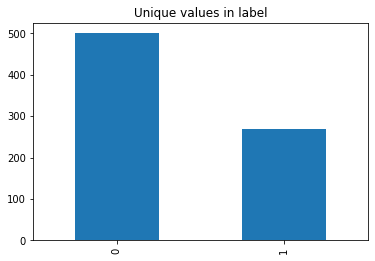

In [8]:
df[8].value_counts().plot(kind = 'bar', title = 'Unique values in label')

We observe that values '0' are around two times the value of '1' which means that our model can become biased towrds predicting 0s let us now delve into Machine Learning coding to find out the results.

# 1. Simple Classifier Model

array([[-0.85139625,  2.58220867,  0.41130177,  1.46077001, -0.63846883,
         1.48550547,  2.8541246 , -0.93508049],
       [-0.55685917, -0.40571403,  0.30558565,  0.64358349,  0.31214197,
         0.24630035, -0.22164105, -0.84859906],
       [ 0.03221499, -1.41251407, -0.32871105, -1.24223155, -0.63846883,
         0.29959949, -0.26202989, -0.67563619]])

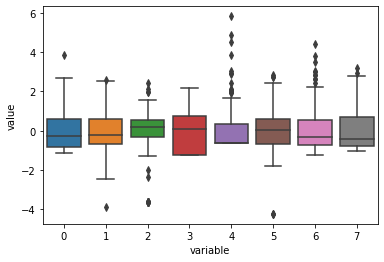

In [9]:
# Separating the features and label
X = df.drop(8, axis = 1)
y = df[8]

# Split the test and train
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Normalizing the X feature set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =  sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# let's look at the tranformed X_train set
sns.boxplot(x = "variable", y = "value", data = pd.melt(pd.DataFrame(X_train)))
X_train[:3]

The distribution for different features is around zerom now after normalization. Let us continue with the modelling

In [10]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_LR = LR.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_LR)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[286,  43],
       [ 73, 110]])

In [11]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy Score : ",accuracy_score(y_test, y_LR),"\n\n")

print(classification_report(y_test,y_LR))

Accuracy Score :  0.7734375 


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       329
           1       0.72      0.60      0.65       183

    accuracy                           0.77       512
   macro avg       0.76      0.74      0.74       512
weighted avg       0.77      0.77      0.77       512



In [12]:
print("Accuracy Score for training: ",accuracy_score(y_train, LR.predict(X_train)),"\n\n")


Accuracy Score for training:  0.796875 




We see that the base classifier has lower precision and recall value for '1' label. We can try to improve this with changing the threshold but the accuracy score from the training set tells us that problem with the current model is of under-fitting

Let us see if decision tree works any better for such data set
# 2. Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = 0)

DT.fit(X_train, y_train)

y_DT = DT.predict(X_test)

confusion_matrix(y_test, y_DT)

array([[222, 107],
       [ 63, 120]])

In [14]:
print("Accuracy Score for training: ",accuracy_score(y_train, DT.predict(X_train)),"\n\n")
print("Accuracy Score for testing: ",accuracy_score(y_test, y_DT,"\n\n"))

Accuracy Score for training:  1.0 


Accuracy Score for testing:  0.66796875


What we observe here is opposite from Binary Classifier. Our current model is over-fitting on the training data set and we see that the accuracy for training is 1 while the model performs much worse in testing. We would now work to reduce the variance in the model

In [15]:
DT = DecisionTreeClassifier(random_state = 0, max_depth = 5)
DT.fit(X_train, y_train)

y_DT = DT.predict(X_test)
print("Accuracy Score for training: ",accuracy_score(y_train, DT.predict(X_train)),"\n\n")
print("Accuracy Score for testing: ",accuracy_score(y_test, y_DT,"\n\n"))

Accuracy Score for training:  0.88671875 


Accuracy Score for testing:  0.720703125


We see that changing the max_depth in decision tree imporves the test data score but still the level of prediction is not satisfactory. Let us add more complexity to the trees by using a lot many trees aka a Random Forest
# 3. Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 100)
RF.fit(X_train,y_train)
y_RF = RF.predict(X_test)

In [17]:
print("Accuracy Score for training: ",accuracy_score(y_train, RF.predict(X_train)),"\n\n")
print("Accuracy Score for testing: ",accuracy_score(y_test, y_RF,"\n\n"))
confusion_matrix(y_test, y_RF)

Accuracy Score for training:  1.0 


Accuracy Score for testing:  0.740234375


array([[279,  50],
       [ 83, 100]])

In [18]:
# We observe still high variance to be fixed let us try to refine the model by tuning the hyper-parameters
param_dict = {
                'n_estimators': [100,200,500],
                'max_depth': range(5,20,2)
                } # so we want to see weather number of trees and tree depth could help us reduce the variance

from sklearn.model_selection import GridSearchCV 
RFGridSearch_model = GridSearchCV(RF,param_dict)

RFGridSearch_model.fit(X_train,y_train)


RFGridSearch_model.best_params_


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 5, 'n_estimators': 100}

In [19]:
RF = RandomForestClassifier(n_estimators = 100, max_depth = 9)
RF.fit(X_train,y_train)
y_RF = RF.predict(X_test)
print("Accuracy Score for training: ",accuracy_score(y_train, RF.predict(X_train)),"\n\n")
print("Accuracy Score for testing: ",accuracy_score(y_test, y_RF,"\n\n"))
confusion_matrix(y_test, y_RF)

Accuracy Score for training:  1.0 


Accuracy Score for testing:  0.76171875


array([[281,  48],
       [ 74, 109]])

# 4. Deep Neural Network

In [20]:
# The grid-search allowed us to tune the parameters with a little more better results in testing
# Would deep learning offer more insights? Let us try neural network
import tensorflow as tf
X_test.shape

(512, 8)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.Input(shape = (8,)),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='elu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation='relu'),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mean_squared_logarithmic_error',
              metrics=['accuracy'])

In [50]:
model.fit(X_train, y_train, epochs=300)



Train on 256 samples
Epoch 1/300
256/256 [==============================] - 0s 84us/sample - loss: 0.0885 - acc: 0.7500
Epoch 2/300
256/256 [==============================] - 0s 57us/sample - loss: 0.0895 - acc: 0.7539
Epoch 3/300
256/256 [==============================] - 0s 56us/sample - loss: 0.0884 - acc: 0.7656
Epoch 4/300
256/256 [==============================] - 0s 69us/sample - loss: 0.0917 - acc: 0.7578
Epoch 5/300
256/256 [==============================] - 0s 55us/sample - loss: 0.0909 - acc: 0.7422
Epoch 6/300
256/256 [==============================] - 0s 54us/sample - loss: 0.0905 - acc: 0.7539
Epoch 7/300
256/256 [==============================] - 0s 57us/sample - loss: 0.0893 - acc: 0.7617
Epoch 8/300
256/256 [==============================] - 0s 60us/sample - loss: 0.0846 - acc: 0.7734
Epoch 9/300
256/256 [==============================] - 0s 61us/sample - loss: 0.0889 - acc: 0.7422
Epoch 10/300
256/256 [==============================] - 0s 57us/sample - loss: 0.0895 - 

In [51]:
model.evaluate(X_test,  y_test, verbose=2)

512/512 - 0s - loss: 0.0857 - acc: 0.7520


[0.08572019496932626, 0.7519531]

In [56]:
y_dnn = model.predict(X_test)
import numpy as np
y_dnn =  np.around(y_dnn) # convert sigmoid function to label
y_dnn

confusion_matrix(y_test, y_dnn)

array([[288,  41],
       [ 86,  97]])

__Conclusion__: We have seen a simple classification problem approached through different ML algorithms. The basic models were underfit and the more complex models were overfitting. The variance in deep neural network was low but more data would be needed to make model more robust